<h1>PREDITOR DE AÇÕES</h1>

<h2>SUMÁRIO</h2>

---
<h2>INTRODUÇÃO</h2>
<h3>Definição do problema</h3>

Ações representam partes fracionadas de companhias que possuem capital aberto, em outras palavras, são títulos que são negociados na Bolsa de Valores. As ações se enquadram em três categorias: ON, PN e UNIT. A diferença entre elas é que as ações ordinárias (ON) dão direito a voto nas assembleias da empresa e as ações preferenciais (PN) possuem preferência na distribuição dos resultados. Já as UNITs são formadas pelos dois tipos.

Esse tipo de investimento atrai cada vez mais brasileiros para a Bolsa de Valores. A quantidade de investidores pessoa física operando nesse mercado passou dos 3 milhões em 2020, mesmo diante do cenário de pandemia, e o volume financeiro negociado foi de mais de R$6.4 trilhões no mesmo ano.

Para uma modalidade que vem batendo recordes de pontos com seu principal índice de ações, o Ibovespa, o interesse faz todo sentido. Afinal, para quem quer impulsionar as finanças, bons investimentos sempre são bem-vindos.

No entanto, comprar ações é um desafio, tanto para profissionais que trabalham na área, quanto para pessoas comuns que querem investir seu dinheiro. Este é um mercado cheio de incertezas e o conceito de Entropia se faz fortemente neste âmbito. Identificar padrões matemáticos e traçar tendências são uma ótima forma de tentar identificar como as ações se comportam e como irão se comportar ao longo do tempo.

Além de identificar padrões e tendências, é possível também aplicar técnicas mais avançadas para tentar prever o futuro do mercado financeiro. Técnicas como: modelos ARIMA e Redes Neurais Recorrents (RNNS). Tais técnicas exigem um grau de abstração maior, mas compensam como sendo ferramentas poderosas para auxiliar na tomada de decisão.

<h3>Objetivos do projeto</h3>

Dado o contexto, este projeto tem por objetivo, o desenvolvimento de um modelo capaz de prever o preço das ações em um futuro próximo e determinar se o ativo vai se valorizar ou desvalorizar. 

Os dados serão coletados via API fornecida pelo Yahoo. O projeto também aborda uma análise exploratória e descritiva dos dados utilizando diversas ferramentas e técnicas empregadas no uso de análise de séries temporais.

<h3>Conceitos</h3>

**O que são ações?**

Como citado anteriormente, ações são títulos que representam uma pequena parte do valor das companhias ou sociedades anônimas. Ou seja, uma ação é como se fosse uma pequena fatia de uma empresa.

Quando uma instituição decide expandir seu negócio, muitas vezes necessita buscar mais dinheiro para isso. Portanto, muitas delas se tornam companhias de capital aberto e ofertam suas ações — chamadas também de papéis — no mercado para obter recursos. Dessa forma, qualquer pessoa devidamente registrada na Bolsa de Valores pode adquirir esses títulos, passando a integrar o grupo de acionistas da companhia. Para a empresa que está distribuindo as ações no mercado, os recursos captados poderão ser usados como investimento em novos projetos e também elevarão o valor de mercado da companhia.

Para quem investe, as vantagens também são animadoras. Afinal de contas, comprar ações é a forma mais simples de se tornar sócio de uma empresa. Os acionistas passam a ter direitos e deveres, de acordo com a quantidade de ações que adquiriu.

Isto é, acionistas com maior participação têm mais responsabilidades e, da mesma forma, retornos melhores. Independentemente da quantidade de ações compradas, um acionista pode receber parte dos lucros obtidos pela empresa. Só é preciso lembrar que o valor a receber depende da quantidade de ações que se tem em carteira.

Por outro lado, precisamos destacar que quem investe nesse mercado também está sujeito a ter perdas. É por isso que fazer uma aplicação no Mercado de Ações é considerado um investimento de risco.

Isso porque esse mercado é muito dinâmico, isto é, ele se movimenta diariamente de acordo com o interesse dos investidores. Por isso podemos chamar de investimentos de renda variável. Para algumas pessoas, as variações no preço de uma ação são vistas como um grande problema. Na verdade, o que nem todos sabem é que essas oscilações fazem surgir ótimas oportunidades de investimento.

É claro que saber como lidar com essas altas e baixas é fundamental para potencializar resultados e suavizar os riscos. Investir em ações é uma habilidade que é adquirida com tempo, estudo e prática. E, é claro, que não podemos esquecer de que essas habilidades têm que vir junto do uso de boas análises do mercado, seja no curto ou no longo prazo.

*****

**Importações dos pacotes de bibliotecas**

In [212]:
# Análise dos dados
import pandas as pd
import numpy as np 

# Visualização dos dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Computação estatística
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# Imports análise e modelagem de séries temporais
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

# Imports para análise de dados
import scipy
from scipy.stats import boxcox

# Pacote que fornece a API para comunicação com o Yahoo Finances
import yfinance as yf

---
<h2>COLETA DE DADOS</h2>

In [2]:
ticket = yf.Ticker('PETR4.SA')

df = ticket.history(interval='1mo', start='2016-01-01', end='2022-08-01')

In [3]:
lista = '[]'
if not isinstance(lista, list):
    print(True)
else:
    print(False)

True


In [4]:
def coletaDados(list_codigos = [], interval = '1mo', start = '2015-01-01', end='2022-01-01'):
    
    if not isinstance(list_codigos, list):
        aux = list_codigos
        list_codigos = [aux]

    if len(list_codigos) == 0:
        return 'Erro: Insira um código em empresa listada.'


    list_dfs = []
    try:
        for codigo in list_codigos:
            ticket = yf.Ticker(codigo)
            aux = ticket.history(interval=interval, start=start, end=end)
            #aux.reset_index(inplace=True)
            aux['Ticket'] = codigo

            list_dfs.append(aux)

        return list_dfs

    except Exception as e: 
        print(e)
        return 'Erro: Erro ao ler os dados'

In [5]:
df = coletaDados('PETR4.SA', interval='1d', start='2015-01-01', end='2022-08-04')[0]

In [6]:
df.shape

(1886, 8)

---
<h2>ANÁLISE DOS DADOS</h2>

<h3>Análise Exploratória</h3>

In [7]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket
Date,,,,,,,,
2015-01-02,6.178821,6.178821,5.782981,5.789166,49559500,0.0,0,PETR4.SA
2015-01-05,5.653097,5.684022,5.275811,5.294367,78385100,0.0,0,PETR4.SA
2015-01-06,5.387140,5.461360,4.972745,5.121185,84723300,0.0,0,PETR4.SA
2015-01-07,5.294366,5.399510,5.170665,5.362401,85531000,0.0,0,PETR4.SA
2015-01-08,5.436621,5.807722,5.405696,5.708761,83306300,0.0,0,PETR4.SA


In [8]:
df.shape

(1886, 8)

In [9]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Ticket          0
dtype: int64

In [10]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
Ticket           object
dtype: object

In [11]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1886.000000,1886.000000,1886.000000,1886.000000,1.886000e+03,1886.000000,1886.0
mean,13.560694,13.770035,13.336253,13.547828,6.148957e+07,0.007529,0.0
std,6.550118,6.631014,6.468965,6.555772,3.284208e+07,0.140298,0.0
min,2.597703,2.640998,2.548223,2.597703,0.000000e+00,0.000000,0.0
25%,8.318834,8.448719,8.134829,8.318832,4.106188e+07,0.000000,0.0
50%,13.090684,13.273023,12.846798,13.081976,5.492630e+07,0.000000,0.0
75%,17.916101,18.130118,17.740709,17.931674,7.385445e+07,0.000000,0.0
max,34.009998,34.660000,33.560001,34.150002,4.902304e+08,3.715490,0.0


In [12]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket
Date,,,,,,,,
2015-01-02,6.178821,6.178821,5.782981,5.789166,49559500,0.0,0,PETR4.SA
2015-01-05,5.653097,5.684022,5.275811,5.294367,78385100,0.0,0,PETR4.SA
2015-01-06,5.387140,5.461360,4.972745,5.121185,84723300,0.0,0,PETR4.SA
2015-01-07,5.294366,5.399510,5.170665,5.362401,85531000,0.0,0,PETR4.SA
2015-01-08,5.436621,5.807722,5.405696,5.708761,83306300,0.0,0,PETR4.SA
...,...,...,...,...,...,...,...,...
2022-07-28,31.590000,32.630001,31.430000,32.290001,114996500,0.0,0,PETR4.SA
2022-07-29,33.599998,34.660000,32.830002,34.150002,181480600,0.0,0,PETR4.SA
2022-08-01,34.000000,34.150002,33.220001,33.680000,81365100,0.0,0,PETR4.SA


<AxesSubplot:xlabel='Date'>

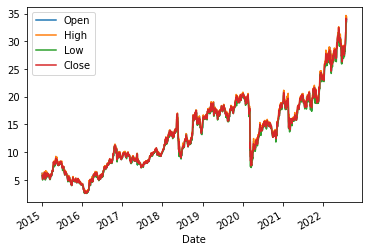

In [13]:
df[['Open', 'High', 'Low', 'Close']].plot()

<h3>Análise Descritiva</h3>

In [14]:
df.reset_index(inplace=True)

In [76]:
def expandirDataFrame(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['YearMonth'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m'))

    dayweek_map = {
        0 : 'Monday',
        1 : 'Tuesday',
        2 : 'Wednesday',
        3 : 'Thursday',
        4 : 'Friday',
        5 : 'Saturday',
        6 : 'Sunday'
    }

    months_map = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    }

    df['NameMonths'] = df['Month'].map(months_map)

    df['NameDayOfWeek'] = df['DayOfWeek'].map(dayweek_map)

    return df

In [77]:
df = expandirDataFrame(df)

In [78]:
def exibirTimeSeries(df, x = 'columnX', y = 'columnY', title = 'Title Default', width = 1000, height = 400, xlabel='xlabel', ylabel='ylabel'):
    fig = px.line(df, x = x, y = y)

    fig.update_layout(
        title=f'<span>{title}</span>', 
        autosize=False,
        width=width,
        height=height,
        xaxis=dict(title=f'<span>{xlabel}</span>'),
        yaxis=dict(title=f'<span>{ylabel}</span>')
    )

    fig.show()

In [79]:
def exibirBarPlot(df, x = 'columnX', y = 'columnY', title = 'Title Default', width = 1000, height = 400, xlabel='xlabel', ylabel='ylabel'):
    fig = px.bar(df, x = x, y = y)

    fig.update_layout(
        title=f'<span>{title}</span>', 
        autosize=False,
        width=width,
        height=height,
        xaxis=dict(title=f'<span>{xlabel}</span>'),
        yaxis=dict(title=f'<span>{ylabel}</span>')
    )

    fig.show()

In [80]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket,Year,Month,Day,Week,DayOfWeek,YearMonth,NameDayOfWeek,Rentability,NameMonths
0,2015-01-02,6.178821,6.178821,5.782981,5.789166,49559500,0.0,0,PETR4.SA,2015,1,2,1,4,2015-01-01,Friday,NaN,January
1,2015-01-05,5.653097,5.684022,5.275811,5.294367,78385100,0.0,0,PETR4.SA,2015,1,5,2,0,2015-01-01,Monday,-8.546985,January
2,2015-01-06,5.387140,5.461360,4.972745,5.121185,84723300,0.0,0,PETR4.SA,2015,1,6,2,1,2015-01-01,Tuesday,-3.271062,January
3,2015-01-07,5.294366,5.399510,5.170665,5.362401,85531000,0.0,0,PETR4.SA,2015,1,7,2,2,2015-01-01,Wednesday,4.710154,January
4,2015-01-08,5.436621,5.807722,5.405696,5.708761,83306300,0.0,0,PETR4.SA,2015,1,8,2,3,2015-01-01,Thursday,6.459060,January


In [81]:
px.line(x=df['Date'], y=df['Close'])

**Volume**

In [82]:
df_volume = df.groupby(['Year'], as_index=False)['Volume'].sum()

exibirTimeSeries(df_volume, 'Year', 'Volume', title='Volume de transações ao longo dos anos', ylabel='Volume', xlabel='Anos')

In [83]:
df_volume = df.groupby(['YearMonth'], as_index=False)['Volume'].sum()


exibirTimeSeries(df_volume, 'YearMonth', 'Volume', title='Volume de transações ao longo dos anos e meses', ylabel='Volume', xlabel='Anos e Meses')

In [86]:
df_volume = df.groupby(['NameMonths', 'Month'], as_index=False)['Volume'].sum().sort_values(by='Month')

exibirBarPlot(df_volume, 'NameMonths', 'Volume', title='Quantidade de Transações por Meses', ylabel='Volume', xlabel='Meses')

In [87]:
df_volume = df.groupby(['Week'], as_index=False)['Volume'].sum()

exibirBarPlot(df_volume, 'Week', 'Volume', title='Quantidade de Transações por Semanas do Ano', ylabel='Volume', xlabel='Semanas do Ano')

In [88]:
df_volume = df.groupby(['Day'], as_index=False)['Volume'].sum()

exibirBarPlot(df_volume, 'Day', 'Volume', title='Quantidade de Transações por Dias do Mês', ylabel='Volume', xlabel='Dias do Mês')

In [92]:
df_volume = df.groupby(['Day', 'NameMonths'], as_index=False)['Volume'].sum()

df_volume.sort_values(by=['Volume'], ascending=False)[0:15]

,Day,NameMonths,Volume
252,22,February,770615700
101,9,March,679716300
197,17,March,669502100
113,10,March,650877200
210,18,May,621757600
264,23,February,603203400
29,3,March,595204500
280,24,May,592630800
5,1,June,569888100
209,18,March,567238800


In [95]:
df_volume = df.groupby(['NameDayOfWeek', 'DayOfWeek'], as_index=False)['Volume'].sum().sort_values(by='DayOfWeek')

exibirBarPlot(df_volume, 'NameDayOfWeek', 'Volume', title='Quantidade de Transações por Dias da Semana', ylabel='Volume', xlabel='Dias da Semana')

**Rentabilidade**

In [107]:
#Rentabilidade é preço atual/ preço anterior * 100 - 100
df[['Rentability']] = df[['Close']] / df[['Close']].shift() * 100 - 100

print('Rentabilidade Total no Período: {}'.format(round(df['Rentability'].sum(), 3)))
print('Rentabilidade Média no Período: {}'.format(round(df['Rentability'].mean(), 3)))

Rentabilidade Total no Período: 275.391
Rentabilidade Média no Período: 0.146


In [102]:
df_volume = df.groupby(['Year'], as_index=False)['Rentability'].mean()


exibirTimeSeries(df_volume, 'Year', 'Rentability', title='Rentabilidade em média ao longo dos Anos', ylabel='Média', xlabel='Anos')

In [103]:
df_volume = df.groupby(['YearMonth'], as_index=False)['Rentability'].mean()

exibirTimeSeries(df_volume, 'YearMonth', 'Rentability', title='Rentabilidade em média ao longo dos Anos e Meses', ylabel='Média', xlabel='Anos')

In [104]:
df_volume = df.groupby(['Date'], as_index=False)['Rentability'].mean()

exibirTimeSeries(df_volume, 'Date', 'Rentability', title='Rentabilidade em média ao longo de todo o período', ylabel='Média', xlabel='Anos')

In [105]:
df_volume = df.groupby(['NameMonths', 'Month'], as_index=False)['Rentability'].mean().sort_values(by='Month')

exibirBarPlot(df_volume, 'NameMonths', 'Rentability', title='Rentabilidade em média ao longo dos meses', ylabel='Média', xlabel='Anos')

<h3>Análise de Séries Temporais</h3>

In [109]:
exibirTimeSeries(df, x=df['Date'], y=df['Close'], title='Série Temporal do Valor de Fechamento', xlabel='Período', ylabel='Valor')

O gráfico acima mostra 2 componentes da série: Sazonalidade e Tendência.

* Sazonalidade - o fenômeno se repete em períodos fixos.
* Tendência - ao longo do tempo, a série segue uma tendência de crescimento.

Outro aspecto a considerar é o comportamento cíclico. Isso acontece quando o padrão de subida e descida da série não ocorre em intervalos fixos baseados em calendário. Deve-se tomar cuidado para não confundir efeito "cíclico" com efeito "sazonal".

Então, como diferenciar um padrão "cíclico" versus "sazonal"?

Se os padrões não tiverem frequências fixas baseadas em calendário, será cíclico. Porque, diferentemente da sazonalidade, os efeitos cíclicos são tipicamente influenciados pelos negócios e outros fatores socioeconômicos.

Analisar o gráfico da densidade de observações pode fornecer mais informações sobre a estrutura dos dados. Vamos criar o gráfico:

O Skewness do conjunto é: 0.5932555665011964


<AxesSubplot:xlabel='Close', ylabel='Count'>

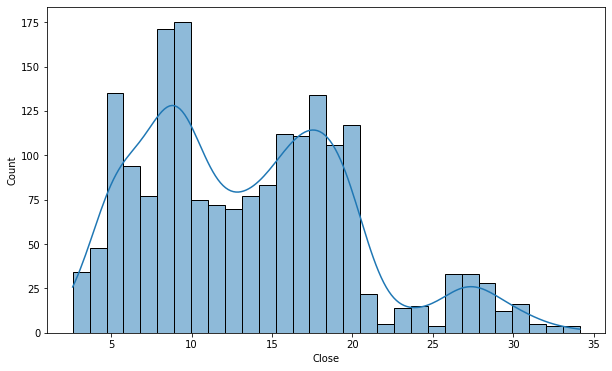

In [116]:
print('O Skewness do conjunto é: {}'.format(df['Close'].skew()))
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True, bins=30)

Análise:

* A distribuição não é perfeitamente gaussiana (distribuição normal).
* A distribuição está inclinada para a esquerda.
* As transformações podem ser úteis antes da modelagem.

Vamos agora criar Box Plots para cada ano da série.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Year', ylabel='Close'>

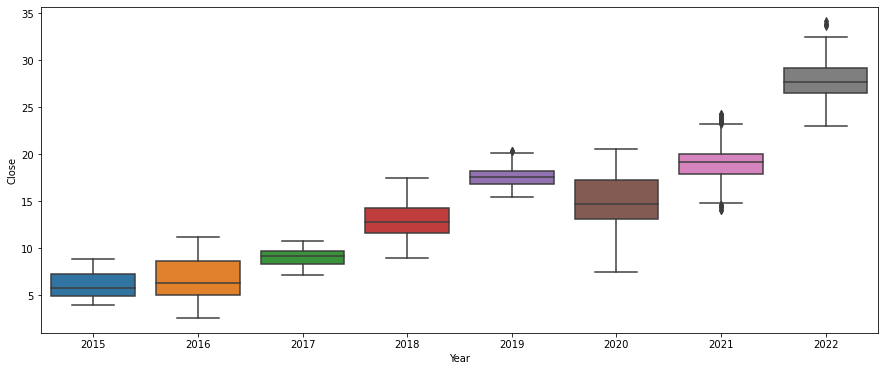

In [117]:
# Define a área de plotagem para os subplots (os boxplots)
fig, ax = plt.subplots(figsize=(15,6))

# Cria um box plot para cada ano usando o Seaborn
sns.boxplot(df['Year'], df['Close'], ax = ax)

Análise:
* Valores medianos ao longo dos anos confirmam uma tendência ascendente.
* Um modelo considerando a sazonalidade pode funcionar bem para prever esta série.

<h3>Séries Temporais Aditivas e Multiplicativas</h3>

Dependendo da natureza da tendência e da sazonalidade, uma série temporal pode ser modelada como aditiva ou multiplicativa, em que cada observação na série pode ser expressa como uma soma ou um produto dos componentes:

* **Séries temporais aditivas**: Valor = Nível Base + Tendência + Sazonalidade + Erro
* **Séries temporais multiplicativas**: Valor = Nível Base x Tendência x Sazonalidade x Erro

<h3>Descomposição da Série Temporal</h3>

- Podemos usar os modelos estatísticos para realizar uma decomposição dessa série cronológica.
- A decomposição de séries temporais é uma tarefa estatística que desconstrói uma série temporal em vários componentes, cada um representando uma das categorias de padrões.
- Com os modelos de estatísticas, poderemos ver a tendência, os componentes sazonais e residuais de nossos dados.

Você pode fazer uma decomposição clássica de uma série temporal, considerando a série como uma combinação aditiva ou multiplicativa do nível base, tendência, índice sazonal e residual.

A função seasonal_decompose do pacote Statsmodels em Python implementa isso convenientemente. Aqui o site do Statsmodels com bastante documentação: https://www.statsmodels.org/

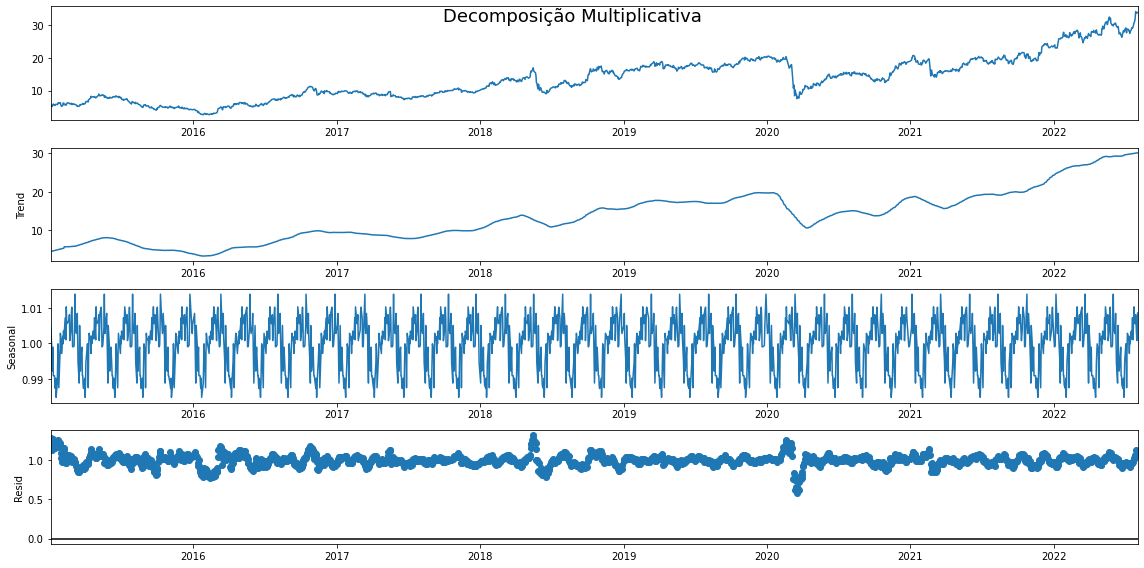

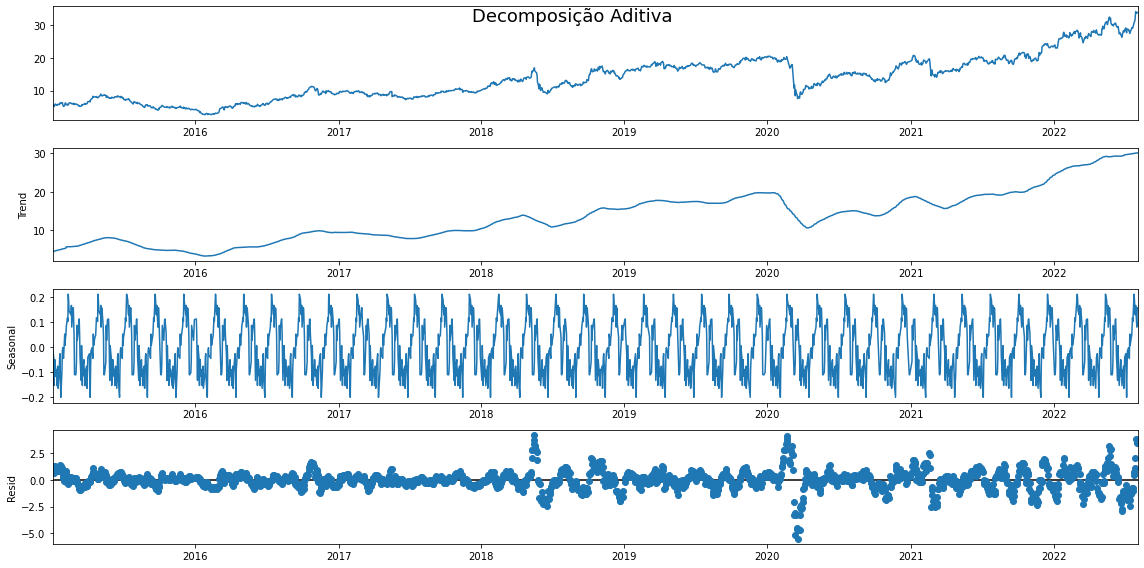

In [125]:
df.index = df['Date']

# Multiplicative Decomposition 
decomposicao_multiplicativa = sm.tsa.seasonal_decompose(df[['Close']], period=50, model = 'multiplicative', extrapolate_trend = 'freq')

# Additive Decomposition
decomposicao_aditiva = sm.tsa.seasonal_decompose(df[['Close']], period=50, model = 'aditive', extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (16,8)})
decomposicao_multiplicativa.plot().suptitle('Decomposição Multiplicativa', fontsize = 18)
decomposicao_aditiva.plot().suptitle('Decomposição Aditiva', fontsize = 18)
plt.show()

No gráfico acima podemos ver os componentes da série temporal:

**1.** A primeira linha do gráfico mostra os dados ;<br/>
**2.** A segunda linha mostra a tendência do gráfico, que claramente é uma tendência de crescimento, ou seja, o valor de fechamento `Close` tende a crescer ao longo do tempo;<br/>
**3.** A terceira linha mostra a sazonalidade. Claramente temos períodos regulares de aumento e queda;<br/>
**4.** A quarta linha é o componete irregular ou resíduo.

Definir extrapolate_trend = 'freq' cuida de todos os valores ausentes na tendência e nos resíduos no início da série (se existirem, claro).

Se você observar atentamente os resíduos da decomposição aditiva, ela permanece com algum padrão. A decomposição multiplicativa, no entanto, parece bastante aleatória, o que é bom. Então, idealmente, a decomposição multiplicativa deve ser preferida para essa série específica.

A saída numérica da tendência, os componentes sazonais e residuais são armazenados na própria saída decomposicao_multiplicativa. Vamos extraí-los e colocá-los em uma tabela de dados.

In [126]:
# Tipo do objeto
type(decomposicao_multiplicativa)

statsmodels.tsa.seasonal.DecomposeResult

In [127]:
# Concatena o resultado da decomposição da série
dados_serie_reconstruida = pd.concat([decomposicao_multiplicativa.seasonal, 
                                      decomposicao_multiplicativa.trend, 
                                      decomposicao_multiplicativa.resid, 
                                      decomposicao_multiplicativa.observed], axis = 1)

# Define o nome das colunas
dados_serie_reconstruida.columns = ['Sazonalidade', 'Tendência', 'Resíduos', 'Valores_Observados']

# Mostra o resultado
dados_serie_reconstruida.head()

,Sazonalidade,Tendência,Resíduos,Valores_Observados
Date,,,,
2015-01-02,1.005044,4.506654,1.278135,5.789166
2015-01-05,0.998914,4.543424,1.166548,5.294367
2015-01-06,0.992211,4.580194,1.126893,5.121185
2015-01-07,0.996663,4.616964,1.165344,5.362401
2015-01-08,0.998929,4.653734,1.228020,5.708761


<h3>Estacionaridade</h3>

Uma suposição comum em muitas técnicas de séries temporais é que os dados sejam estacionários. Um processo estacionário tem a propriedade de que a média, variância e estrutura de autocorrelação não mudam no decorrer do tempo. 

Estacionariedade pode ser definida em termos matemáticos precisos, mas para os nossos propósitos queremos dizer uma série parecida com um plano liso, sem tendência, variância constante no decorrer do tempo, um estrutura de autocorrelação constante no decorrer do tempo e nenhuma flutuação periódica (sazonalidadae).

**Vejamos**:

* Uma série temporal é considerada estacionária se suas propriedades estatísticas, como média e variância, permanecerem constantes ao longo do tempo.

* A maioria dos modelos de séries temporais trabalha com o pressuposto de que a série temporal é estacionária. A principal razão para isso é que existem muitas maneiras pelas quais uma série pode ser não estacionária, mas apenas uma para estacionariedade.

* Intuitivamente, podemos dizer que, se uma série temporal tem um comportamento específico ao longo do tempo, há uma probabilidade muito alta de que ela siga o mesmo no futuro.

* Além disso, as teorias relacionadas às séries estacionárias são mais maduras e mais fáceis de implementar em comparação às séries não estacionárias.

A estacionariedade é um importante conceito na modelagem de séries temporais e é caracterizada por uma variável que se comporta de forma aleatória ao longo do tempo ao redor de uma média constante.

Basicamente, séries temporais que possuem tendência e/ou sazonalidade não são estacionárias e é necessário o uso de técnicas adequadas a tal situação.

**Verificando a Estacionariedade**

Podemos verificar a estacionariedade de uma série temporal da seguinte forma:

* **Plot das Rolling Statistics (Estatísticas Móveis)**: Podemos criar um plot da média móvel e variância móvel (ou desvio padrão, que é a raiz quadrada da variância) e ver se variam com o tempo. A média / variância móvel é, para qualquer instante 't', a média / variância do último ano, ou seja, os últimos 12 meses.
* **Autocorrelação com Gráficos ACF e PACF**: Se a série temporal for estacionária, os gráficos ACF / PACF (gráficos de autocorrelação da série) mostrarão um padrão específico.
* **Teste Dickey-Fuller**: Este é um dos testes estatísticos para verificar a estacionariedade. Aqui, a hipótese nula é que a série temporal não é estacionária. Os resultados do teste incluem uma estatística de teste e alguns valores críticos para os níveis de confiança das diferenças. Se a 'Estatística de teste' for menor que o 'valor crítico', podemos rejeitar a hipótese nula e dizer que a série é estacionária.

---

**O Que São Lags (Defasagens ou Atrasos)?**<br/>
Uma maneira de analisar os dados de séries temporais é plotar cada observação contra outra observação que ocorreu algum tempo antes. Por exemplo, você pode plotar `yt` contra `yt-1.` Nesse caso, `yt-1` é o atraso da série, o lag.

As correlações associadas aos gráficos de atraso formam o que é chamado de "função de autocorrelação". A autocorrelação é quase a mesma que a correlação de Pearson (que usamos em modelos de Regressão). No entanto, a autocorrelação é a correlação de uma série temporal com uma cópia atrasada (lag, atraso ou defasagem) de si mesma.

A `função de autocorrelação (ACF) `é o principal método na análise de séries temporais para quantificar o nível de correlação entre uma série e seus atrasos. Esse método é bastante semelhante (matematicamente e logicamente) ao coeficiente de correlação de Pearson.

---
**Autocorrelação**<br/>
Os modelos estatísticos mais conhecidos e utilizados, como a Regressão Linear e o Regressão Logística, são adequados na modelagem de variáveis em que as observações são independentes. Em uma série temporal, não há como desconsiderar a estrutura de dependência das observações.

Por exemplo, a quantidade vendida de sorvete em janeiro pode estar relacionada à quantidade vendida em dezembro, que por sua vez pode estar relacionada com a de novembro e assim por diante. Dessa forma, a utilização desses modelos pode gerar resultados enviesados e que não refletem a realidade.

A autocorrelação é definida como uma observação num determinado instante está relacionada às observações passadas.

As observações podem estar autocorrelacionadas em diversas ordens. A autocorrelação de primeira ordem caracteriza séries onde uma observação está correlacionada com a observação imediatamente anterior (janeiro e dezembro, por exemplo). A autocorrelação de segunda ordem caracteriza séries temporais onde uma observação está correlacionada com as observações a 2 unidades de tempo no passado (janeiro e novembro, por exemplo).

A identificação da autocorrelação é feita através da Função de Autocorrelação (`ACF – Autocorrelation Function`), mostrada abaixo. Além disso, testes como o de Durbin Watson auxiliam na identificação da autocorrelação de primeira ordem.

A autocorrelação é uma ferramenta matemática para encontrar padrões de repetição, como a presença de um sinal periódico obscurecidos pelo ruído. Um diagrama de autocorrelações apresenta os valores de autocorrelação de uma amostra versus o intervalo de tempo em que foi calculado. Autocorrelações devem ser próximas de zero para aleatoriedade. A ocorrência de não estacionariedade é denotada pela lenta queda da `ACF` nos primeiros lags da série. Isto significa que a série deve ser diferenciada, e que um modelo `ARIMA` ou `SARIMA` deve ser aplicado.

Antes de iniciar qualquer modelagem preditiva é necessário verificar se essas propriedades estatísticas são constantes na série temporal:

* Média constante
* Variância constante
* Autocorrelacionada

---

**Plot das Rolling Statistics (Estatísticas Móveis)**

In [175]:
df_month = df.groupby(['YearMonth'], as_index=False)['Close'].sum()


fig = go.Figure()

fig.add_traces(go.Line(x=df_month['YearMonth'], y=df_month['Close'], name='Original'))

# Determinando estatísticas móveis
rolmean = df_month['Close'].rolling(window = 12).mean()
rolstd = df_month['Close'].rolling(window = 12).std()

fig.add_traces(go.Line(x=df_month['YearMonth'], y=rolmean, name='Média Móvel'))
fig.add_traces(go.Line(x=df_month['YearMonth'], y=rolstd, name='Desvio Padrão'))


fig.update_layout(
        title='<span>Plot das Rolling Statistics (Estatísticas Móveis)</span>', 
        autosize=False,
        width=1200,
        height=500,
        xaxis=dict(title=f'<span>Tempo</span>'),
        yaxis=dict(title=f'<span>Valroes</span>')
    )

fig.show()

Análise:

* Observamos que a média móvel e o desvio padrão não são constantes em relação ao tempo (tendência crescente).
* A série cronológica não é, portanto, estacionária.

**Plots ACF e PACF**

Vamos criar os gráficos da função de autocorrelação (ACF) e da função de autocorrelação parcial (PACF).

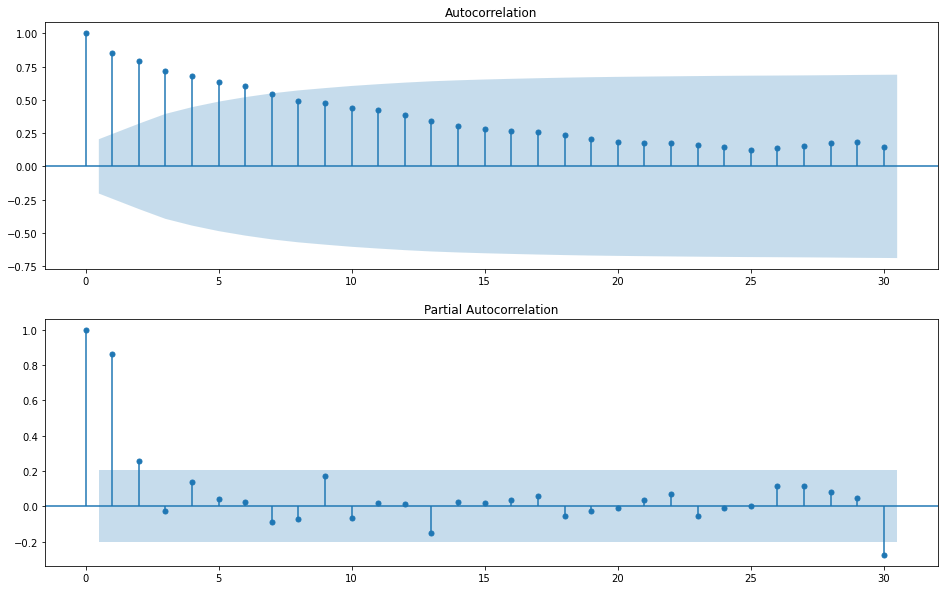

In [176]:
# Plots
plt.rcParams.update({'figure.figsize': (16,10)})

# Plot do gráfico ACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html
plt.subplot(211)
plot_acf(df_month['Close'], ax = plt.gca(), lags = 30)

# Plot do gráfico PACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html
plt.subplot(212)
plot_pacf(df_month['Close'], ax = plt.gca(), lags = 30)
plt.show()

*Interpretação dos Gráficos:*

No gráfico, o eixo vertical indica a autocorrelação e o horizontal a defasagem.

A área sombreada em azul indica onde é significativamente diferente de zero. Como é possível ver na imagem, temos diversos valores ACF (barras verticais) acima do limite da área sombreada em azul. Nesses casos, a autocorrelação é diferente de zero, indicando que a série não é aleatória – conforme o esperado.

Algumas barras verticais estão dentro do limite da área sombreada em azul, Ou seja, a autocorrelação entre a série com alguns de seus lags é igual a zero, indicando que não há correlação.

Em termos simples: a área sombreada em azul aponta a significância. Se ultrapassa é porque tem correlação.

Cada barra no gráfico ACF representa o nível de correlação entre a série e seus atrasos em ordem cronológica. A área sombreada em azul indica se o nível de correlação entre a série e cada atraso é significativo ou não.

Testando a hipótese nula de que a correlação do atraso com a série é igual a zero, podemos rejeitá-la sempre que o nível de correlação estiver acima ou abaixo da área sombreada em azul com um nível de significância de 5%.

Caso contrário, sempre que a correlação estiver dentro da área sombreada em azul, deixamos de rejeitar a hipótese nula e, portanto, podemos ignorar esses atrasos (ou assumir que não há correlação significativa entre eles e a série).

O PACF é apenas uma visualização parcial do ACF.

*Análise:*

* Se a série temporal for estacionária, os gráficos do ACF / PACF mostrarão uma "queda rápida na correlação" após um pequeno atraso entre os pontos. Não é o caso em nossos gráficos. A queda lenda (redução do tamanho das barras) indica que essa série não é estacionária).
* Os dados da nossa série não são estacionários, pois um número alto de observações anteriores está correlacionado com valores futuros.
* Intervalos de confiança são desenhados na área azul clara. Por padrão, isso é definido como um intervalo de confiança de 95%, sugerindo que os valores de correlação fora desta área provavelmente são uma correlação e não um acaso estatístico.
* Teremos que transformar essa série em estacionária antes de criar um modelo preditivo.

---

**Teste Dickey-Fuller aumentado**

* A intuição por trás do teste é que, se a série for integrada, o nível de atraso da série `y (t-1)` não fornecerá informações relevantes na previsão da mudança em `y (t)`.
* Hipótese nula: a série temporal não é estacionária.
* Rejeitar a hipótese nula (ou seja, um valor-p abaixo de 0.05) indicará estacionaridade.

In [177]:
# Teste Dickey-Fuller

# Print
print('\nResultado do Teste Dickey-Fuller:\n')

# Teste
dfteste = adfuller(df['Close'], autolag = 'AIC')

# Formatando a saída
dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                           'Valor-p',
                                           'Número de Lags Consideradas',
                                           'Número de Observações Usadas'])

# Loop por cada item da saída do teste
for key,value in dfteste[4].items():
    dfsaida['Valor Crítico (%s)'%key] = value

# Print
print (dfsaida)


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -0.236754
Valor-p                            0.933997
Número de Lags Consideradas        8.000000
Número de Observações Usadas    1877.000000
Valor Crítico (1%)                -3.433839
Valor Crítico (5%)                -2.863081
Valor Crítico (10%)               -2.567590
dtype: float64


Análise:

* O Valor-p é maior que 0.05. Não temos evidências para rejeitar a hipótese nula de que a série não é estacionária.

Abaixo irei criar uma função que executa o teste de estacionaridade e pode ser aplicada a qualquer série para testar se ela é ou não estacionária.

Se a série não for estacionária, teremos que aplicar transformações antes da modelagem.

In [235]:
def testaEstacionaridade(df, column):
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(df[column], autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

In [236]:
testaEstacionaridade(df, column='Close')


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -0.236754
Valor-p                            0.933997
Número de Lags Consideradas        8.000000
Número de Observações Usadas    1877.000000
Valor Crítico (1%)                -3.433839
Valor Crítico (5%)                -2.863081
Valor Crítico (10%)               -2.567590
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


**Tipos de Estacionariedade**

O que fazer agora que identificamos que a série é não estacionária?<br/>
R: Teremos que transformar esta série em uma série estacionária, mas antes vamos enteder mais sobre séries estacionárias e seus tipos de estacionaridades. Existem três tipos de estacionariedade, vejamos cada uma delas:

**Estacionaridade Estrita**: Uma série estacionária estrita satisfaz a definição matemática de um processo estacionário. Para uma série estacionária estrita, a média, variância e covariância não são funções do tempo. O objetivo é converter uma série não estacionária em uma série estacionária estrita para fazer previsões.

**Estacionaridade de Tendência**: Uma série que não possui raiz unitária, mas exibe uma tendência, é chamada de série estacionária de tendência. Uma vez removida a tendência, a série resultante será estritamente estacionária. O teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin) classifica uma série como estacionária na ausência de raiz da unidade. Isso significa que a série pode ser estacionária estrita ou estacionária de tendência.

**Estacionaridade Diferencial**: Uma série temporal que pode ser tornada estritamente estacionária pela diferenciação é do tipo estacionária diferencial. O teste ADF (Augmented Dickey Fuller) também é conhecido como teste de estacionariedade diferencial.

É sempre melhor aplicar os dois testes, para ter certeza de que a série é realmente estacionária.

---

**Transformando uma Série Não Estacionária em Série Estacionária**

Se a série temporal não for estacionária, podemos frequentemente transformá-la em estacionária com uma das técnicas seguintes (ou combinações delas).

**1.** Transformações de potência. Aplicamos uma transformação matemática aos dados visando remover padrões e transformar a série em estacionária. As transformações de potência mais comuns são a de `log`, `raiz` quadrada e `Box-Cox`.<br/>

**2.** Podemos diferenciar os dados. Isto é, dada a série Yt, criamos a nova série: `Y(i) = Y(i) - Y(i-1)` <br/>
Os dados diferenciados conterão um ponto a menos que os dados originais. Embora você possa diferenciar os dados mais que uma vez, uma diferenciação é geralmente suficiente.

**3.** Se os dados tiverem uma tendência, podemos ajustar algum tipo de curva aos dados e depois então modelar os resíduos daquele ajuste. Desde que o propósito do ajuste é simplesmente remover tendências de longo prazo, um ajuste simples, tal como uma linha reta, é tipicamente usado. <br/>

**4.** Para dados negativos, você pode adicionar uma constante adequada para tornar todos os dados positivos antes de aplicar a transformação. Esta constante pode então ser subtraída do modelo para obter valores previstos (i.e., ajustados) e previsões para pontos futuros. <br/>

As técnicas acima são dirigidas para gerarem séries com localizações e escala constantes. 

**Portanto,** As principais técnicas para aplicar estacionaridade são:

**Transformação**

- Transformação de log
- Transformação exponencial
- Transformação Box Cox
- Transformação da raiz quadrada

**Remoção de Tendência**

- Smoothing (alisamento ou suavização) é usada para remover a tendência da série, calculando médias contínuas ao longo das janelas de tempo.

Mas as técnicas acima não funcionam em todos os casos, principalmente nos de alta sazonalidade. Para esses casos, outras técnicas podem ser usadas:

**Diferenciação**

- Nesta técnica, calculamos a diferença da observação em um determinado instante com a do instante anterior.

**Decomposição**

- Nesta abordagem, a tendência e a sazonalidade são modeladas separadamente e a parte restante da série é retornada.

---

<h3>Transformações</h3>

In [186]:
df_transformed = df[['Close']].copy()
df_transformed.reset_index(inplace=True)

In [187]:
df_transformed.head()

,Date,Close
0,2015-01-02,5.789166
1,2015-01-05,5.294367
2,2015-01-06,5.121185
3,2015-01-07,5.362401
4,2015-01-08,5.708761




Vamos começar pela transformação de log no nosso conjunto de dados.

**Transformação de Log**

Séries temporais com uma distribuição exponencial podem ser linearizadas usando o logaritmo dos valores. Isso é chamado de transformação de log. Você com certeza lembra do que é logaritmo pois estudou isso no ensino fundamental. :-)

As transformações de log são populares em dados de séries temporais, pois são eficazes na remoção da variação exponencial.

É importante observar que esta operação assume que os valores são positivos e diferentes de zero. É comum transformar observações adicionando uma constante fixa para garantir que todos os valores de entrada atendam a esse requisito. Por exemplo: serie_transformada_y = log(constante + x)

In [189]:
# Vamos aplicar uma transformação de log usando np.log() e gravamos o resultado em uma nova coluna do nosso dataset
df_transformed['CloseLog'] = np.log(df_transformed['Close'])
df_transformed.head()

,Date,Close,CloseLog
0,2015-01-02,5.789166,1.755988
1,2015-01-05,5.294367,1.666643
2,2015-01-06,5.121185,1.633386
3,2015-01-07,5.362401,1.679412
4,2015-01-08,5.708761,1.742002


In [197]:
exibirTimeSeries(df_transformed, x='Date', y='Close', title='Série Temporal Normal', xlabel='Período', ylabel='Valores')
exibirTimeSeries(df_transformed, x='Date', y='CloseLog', title='Série Temporal com Transformação de Log', xlabel='Período', ylabel='Valores')

O Skewness da Série Normal é de: 0.5932555665011964
O Skewness da Série Log é de: -0.43015527893838684


<AxesSubplot:xlabel='CloseLog', ylabel='Count'>

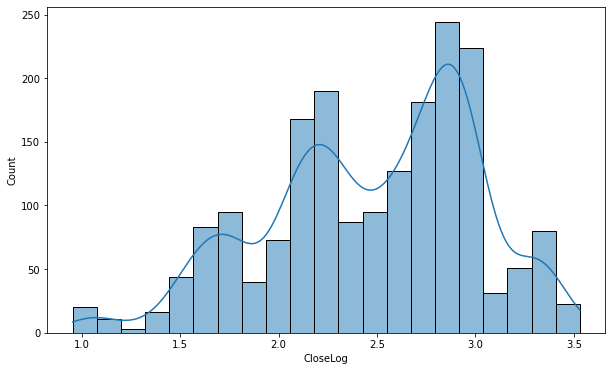

In [196]:
print('O Skewness da Série Normal é de: {}'.format(df_transformed['Close'].skew()))
print('O Skewness da Série Log é de: {}'.format(df_transformed['CloseLog'].skew()))
plt.figure(figsize=(10,6))
sns.histplot(df_transformed['CloseLog'], kde=True)

Análise:

* Embora a Série pareça estar visualmente mais linear, vemos que a transformação log não mudou muita coisa;
* Pelo histograma percebemos que a transformação log se aproximou mais de zero, mas não foi um valor considerável.

---

**Diferenciação**

In [198]:
# Aplicando Diferenciação - Y(i) = Y(i) - Y(i-1)
# Gravamos a série diferenciada no próprio dataset
df_transformed['CloseDiff'] = df_transformed['Close'] - df_transformed['Close'].shift(1)
df_transformed['CloseDiffLog'] = df_transformed['CloseLog'] - df_transformed['CloseLog'].shift(1)
df_transformed.head()

,Date,Close,CloseLog,CloseDiff,CloseDiffLog
0,2015-01-02,5.789166,1.755988,NaN,NaN
1,2015-01-05,5.294367,1.666643,-0.494799,-0.089345
2,2015-01-06,5.121185,1.633386,-0.173182,-0.033258
3,2015-01-07,5.362401,1.679412,0.241216,0.046026
4,2015-01-08,5.708761,1.742002,0.346361,0.062590


In [200]:
exibirTimeSeries(df_transformed, x='Date', y='Close', title='Série Temporal Normal', xlabel='Período', ylabel='Valores')
exibirTimeSeries(df_transformed, x='Date', y='CloseDiff', title='Série Temporal com Transformação de Diferenciação', xlabel='Período', ylabel='Valores')
exibirTimeSeries(df_transformed, x='Date', y='CloseDiffLog', title='Série Temporal com Transformação de Log e de Diferenciação', xlabel='Período', ylabel='Valores')

O Skewness da Série Normal é de: 0.5932555665011964
O Skewness da Série Log é de: -0.43015527893838684
O Skewness da Série Dif é de: -1.3688539142350833
O Skewness da Série Dif Log é de: -1.0898502606465534


<AxesSubplot:xlabel='CloseDiffLog', ylabel='Count'>

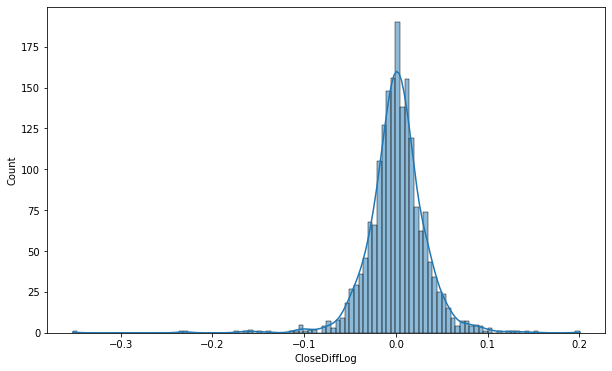

In [201]:
print('O Skewness da Série Normal é de: {}'.format(df_transformed['Close'].skew()))
print('O Skewness da Série Log é de: {}'.format(df_transformed['CloseLog'].skew()))
print('O Skewness da Série Dif é de: {}'.format(df_transformed['CloseDiff'].skew()))
print('O Skewness da Série Dif Log é de: {}'.format(df_transformed['CloseDiffLog'].skew()))
plt.figure(figsize=(10,6))
sns.histplot(df_transformed['CloseDiffLog'], kde=True)

Análise:
* Visualizando o gráfico vemos que a Série perdeu o componente tendência, isso é bom, porém a distribuição se distanciou de uma distribuição normal e ficou pior do que antes.

**Transformação de Raiz Quadrada**

Uma série temporal que tem uma tendência quadrática de crescimento pode ser linearizada calculando sua raiz quadrada.

É possível que uma companhia mostre um crescimento quadrático. Se esse for o caso, poderíamos esperar que uma transformação de raiz quadrada para reduzir a tendência de crescimento seja linear e alterar a distribuição de observações para talvez ser quase gaussiana.

O exemplo abaixo executa uma raiz quadrada do conjunto de dados e plota os resultados.

In [206]:
# Transformação de Raiz Quadrada com np.sqrt()
df_transformed['CloseSqrt'] = np.sqrt(df_transformed['Close'])

In [207]:
exibirTimeSeries(df_transformed, x='Date', y='CloseSqrt', title='Série Temporal com Transformação de Raiz Quadrada', xlabel='Período', ylabel='Valores')

O Skewness da Série Sqrt é de: 0.0944252146787954


<AxesSubplot:xlabel='CloseSqrt', ylabel='Count'>

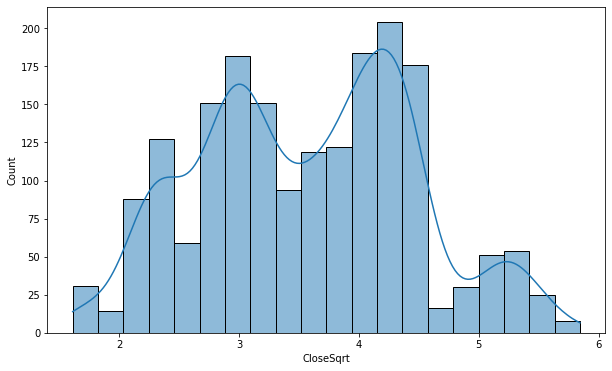

In [210]:
print('O Skewness da Série Sqrt é de: {}'.format(df_transformed['CloseSqrt'].skew()))
plt.figure(figsize=(10,6))
sns.histplot(df_transformed['CloseSqrt'], kde=True)

Análise:
* Podemos ver qua a série manteve o componente tendência, mas a distribuição ficou mais normal segundo a métrica `skewness`. Contudo, o histograma possui dois picos.

--- 

**Transformação Box-Cox**

A transformação de raiz quadrada e a transformação de log pertencem a uma classe de transformações denominadas transformações de potência.

A transformação Box-Cox é um método de transformação de dados configurável que suporta a raiz quadrada e a transformação de log, bem como um conjunto de transformações relacionadas.

Mais do que isso, pode ser configurado para avaliar um conjunto de transformações automaticamente e selecionar o melhor ajuste. Pode ser pensado como uma ferramenta elétrica para resolver mudanças baseadas em energia em suas séries temporais. A série resultante pode ser mais linear e a distribuição resultante mais gaussiana ou uniforme, dependendo do processo que a gerou.

A biblioteca scipy.stats fornece uma implementação da transformação Box-Cox. A função boxcox() usa um argumento, chamado lambda, que controla o tipo de transformação a ser executada.

Abaixo estão alguns valores comuns para lambda

- **lambda = -1.** é uma transformação recíproca.
- **lambda = -0.5** é uma transformação de raiz quadrada recíproca.
- **lambda = 0.0** é uma transformação de log.
- **lambda = 0.5** é uma transformação de raiz quadrada.
- **lambda = 1.0** não é transformação.

Podemos definir o parâmetro lambda como None (o padrão) e deixar a função encontrar um valor ajustado estatisticamente.

In [216]:
# Aplicando Transformação Box-Cox
#df_transformed['CloseBoxCox'] = boxcox(df_transformed['Close'], lmbda = 0.0)
df_transformed['CloseBoxCox'], lambda_value = boxcox(df_transformed['Close'])

print(f'O valor escolhido para lambda: {lambda_value}')
df_transformed.head()

O valor escolhido para lambda: 0.3623651157123217


,Date,Close,CloseLog,CloseDiff,CloseDiffLog,CloseSqrt,CloseBoxCox
0,2015-01-02,5.789166,1.755988,NaN,NaN,2.406069,2.454689
1,2015-01-05,5.294367,1.666643,-0.494799,-0.089345,2.300949,2.288576
2,2015-01-06,5.121185,1.633386,-0.173182,-0.033258,2.263003,2.228103
3,2015-01-07,5.362401,1.679412,0.241216,0.046026,2.315686,2.311987
4,2015-01-08,5.708761,1.742002,0.346361,0.062590,2.389301,2.428329


In [228]:
exibirTimeSeries(df_transformed, x='Date', y='CloseBoxCox', title=f'Série Temporal com Transformação BoxCox e valor Lambda: {lambda_value}', xlabel='Período', ylabel='Valores')

O Skewness da Série BoxCox é de: -0.04558762103272964


<AxesSubplot:xlabel='CloseBoxCox', ylabel='Count'>

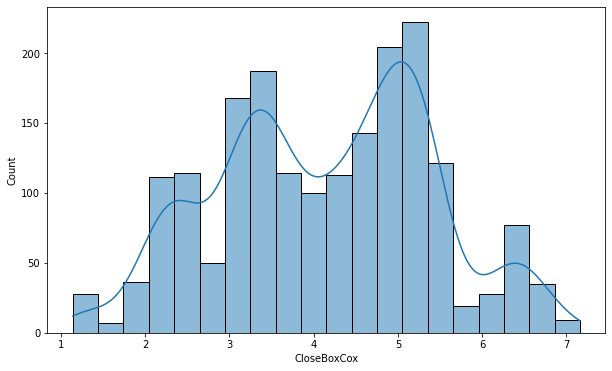

In [218]:
print('O Skewness da Série BoxCox é de: {}'.format(df_transformed['CloseBoxCox'].skew()))
plt.figure(figsize=(10,6))
sns.histplot(df_transformed['CloseBoxCox'], kde=True)

Análise:

A execução do exemplo gerou o valor lambda de 0.362. Podemos ver que isso está mais próximo de um valor lambda de 0.5, resultando em uma tendência de transformação de raiz quadrada.

---

<h3>Suavização(Smoothing) e Diferenciação (Differential smoothing) </h3>

**Smoothing**

Smoothing (Suavização ou Alisamento) em séries temporais é um conjunto de métodos para suavizar séries temporais eliminando "saltos". Existem várias maneiras de fazer isso. Talvez o mais fácil seja calcular a média móvel simples (Simple Moving Average).

A suavização é basicamente uma técnica usada para ver a tendência de longo prazo nos dados, diminuindo os efeitos dos componentes periódicos / sazonais dos dados. Basicamente, usamos suavização quando queremos remover as flutuações nos dados e focamos apenas em preservar as tendências de longo prazo.

A suavização é uma técnica aplicada às séries temporais para remover a variação granular entre as etapas do tempo.

O objetivo de suavizar é remover o ruído e expor melhor o sinal dos processos. As médias móveis são um tipo simples e comum de suavização usado na análise de séries temporais e na previsão de séries temporais.

O cálculo de uma média móvel envolve a criação de uma nova série em que os valores são compostos da média de observações brutas na série temporal original. 

A suavização da média móvel (Moving Average Smoothing) é uma técnica eficaz na previsão de séries temporais também, ou seja, pode ser usado para preparação de dados, engenharia de recursos e até diretamente para fazer previsões.

Uma média móvel requer que você especifique um tamanho de janela chamado largura da janela. Isso define o número de observações brutas usadas para calcular o valor da média móvel.

A parte "móvel" na média móvel refere-se ao fato de que a janela definida pela largura da janela é deslizada ao longo da série temporal para calcular os valores médios na nova série.

Vejamos como isso funciona.

In [220]:
df_smoothing = df_transformed[['Date', 'CloseBoxCox']].copy()
df_smoothing.head()

,Date,CloseBoxCox
0,2015-01-02,2.454689
1,2015-01-05,2.288576
2,2015-01-06,2.228103
3,2015-01-07,2.311987
4,2015-01-08,2.428329


**Média Móvel Simples**

- Calculamos a média de valores 'k' consecutivos, dependendo da frequência da série temporal.
- Aqui podemos calcular a média do último 1 ano, ou seja, os últimos 12 valores.
- Uma desvantagem dessa abordagem específica é que o período de tempo deve ser estritamente definido.

In [221]:
# Primeiro, vamos calcular a média da série (essa não é a média móvel, mas sim a média total)
df_smoothing['CloseBoxCox'].mean()

4.135069204220144

In [222]:
# Vamos criar uma cópia da série original pois isso será importante mais tarde
df_smoothing_cp = df_smoothing.copy()

In [223]:
# Agora definimos uma janela de 12 meses da série temporal para calcular a média móvel
# Vamos gravar o resultado em outra coluna no próprio dataset
df_smoothing_cp['CloseSmoothing'] = df_smoothing_cp['CloseBoxCox'].rolling(window = 12).mean()

In [226]:
df_smoothing_cp.head(15)

,Date,CloseBoxCox,CloseSmoothing
0,2015-01-02,2.454689,NaN
1,2015-01-05,2.288576,NaN
2,2015-01-06,2.228103,NaN
3,2015-01-07,2.311987,NaN
4,2015-01-08,2.428329,NaN
5,2015-01-09,2.484816,NaN
6,2015-01-12,2.347799,NaN
7,2015-01-13,2.399675,NaN
8,2015-01-14,2.362418,NaN
9,2015-01-15,2.444578,NaN


Agora temos duas colunas e alguns valores NaN na coluna das médias móveis. Isso é normal e esperado, afinal, calculamos a média de 12 valores consecutivos "deslizando" a janela pela série e para alguns valores (os primeiros da série) não teremos como calcular a média dos 12 valores anteriores e assim eles ficam como NaN. Ou seja, perdemos registros da série ao aplicar esta técnica de suavização.

In [233]:

fig = go.Figure()

fig.add_traces(go.Line(x=df['Date'], y=df['Close'], name='Original'))
fig.add_traces(go.Line(x=df_smoothing_cp['Date'], y=df_smoothing_cp['CloseBoxCox'], name='Transformação Box Cox'))
fig.add_traces(go.Line(x=df_smoothing_cp['Date'], y=df_smoothing_cp['CloseSmoothing'], name='Transformação Smoothing'))


fig.update_layout(
        title='<span>Plot das Transformações</span>', 
        autosize=False,
        width=1200,
        height=500,
        xaxis=dict(title=f'<span>Tempo</span>'),
        yaxis=dict(title=f'<span>Valroes</span>')
    )

fig.show()

In [242]:
testaEstacionaridade(df=df_smoothing_cp, column='CloseSmoothing')


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -0.788685
Valor-p                            0.822423
Número de Lags Consideradas       25.000000
Número de Observações Usadas    1849.000000
Valor Crítico (1%)                -3.433892
Valor Crítico (5%)                -2.863104
Valor Crítico (10%)               -2.567603
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


**Média Móvel Ponderada Exponencial**

- Para superar o problema de escolher uma janela definida na média móvel, podemos usar a média móvel ponderada exponencial
- Adotamos uma "média móvel ponderada", em que valores mais recentes recebem um peso maior.
- Pode haver muitas técnicas para atribuir pesos. Uma popular é a média móvel ponderada exponencialmente em que os pesos são atribuídos a todos os valores anteriores com um fator de redução.

A função ewm() do Pandas permite aplicar esse método com facilidade.

In [245]:
# Aplicando suavização exponencial
# Observe que estamos aplicando a suavização à série original (antes de aplicar a suavização anterior)
df_smoothing['CloseExp'] = df_smoothing['CloseBoxCox'].ewm(alpha = 0.2, adjust = True).mean()
df_smoothing.head()

,Date,CloseBoxCox,CloseExp
0,2015-01-02,2.454689,2.454689
1,2015-01-05,2.288576,2.362404
2,2015-01-06,2.228103,2.307363
3,2015-01-07,2.311987,2.308929
4,2015-01-08,2.428329,2.344448


In [246]:

fig = go.Figure()

fig.add_traces(go.Line(x=df['Date'], y=df['Close'], name='Original'))
fig.add_traces(go.Line(x=df_smoothing['Date'], y=df_smoothing['CloseBoxCox'], name='Transformação Box Cox'))
fig.add_traces(go.Line(x=df_smoothing['Date'], y=df_smoothing['CloseExp'], name='Transformação Exponencial'))


fig.update_layout(
        title='<span>Plot das Transformações</span>', 
        autosize=False,
        width=1200,
        height=500,
        xaxis=dict(title=f'<span>Tempo</span>'),
        yaxis=dict(title=f'<span>Valroes</span>')
    )

fig.show()

c:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [247]:
testaEstacionaridade(df=df_smoothing, column='CloseExp')


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -0.488410
Valor-p                            0.894259
Número de Lags Consideradas       15.000000
Número de Observações Usadas    1870.000000
Valor Crítico (1%)                -3.433852
Valor Crítico (5%)                -2.863087
Valor Crítico (10%)               -2.567593
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


Análise:

* As técnicas de suavização são consideradas técnicas simples. Em alguns  

---
<h2>PRÉ-PROCESSAMENTO DOS DADOS</h2>

---
<h2>MODELAGEM</h2>

---
<h2>EXPORTANDO O MODELO</h2>

---
<h2>CONSIDERAÇÕES SOBRE OS RESULTADOS OBTIDOS</h2>